In [39]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt



In [40]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Normalize 

In [41]:
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0


to_categorical

In [42]:
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)

before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Architecture

In [43]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer

In [44]:
#compile
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1633 - loss: 2.6526 - val_accuracy: 0.1569 - val_loss: 2.1617
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1704 - loss: 2.1051 - val_accuracy: 0.1765 - val_loss: 2.0955
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1720 - loss: 2.0982 - val_accuracy: 0.1782 - val_loss: 2.0947
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1711 - loss: 2.0903 - val_accuracy: 0.1718 - val_loss: 2.0934
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1764 - loss: 2.0821 - val_accuracy: 0.1738 - val_loss: 2.0842
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1770 - loss: 2.0808 - val_accuracy: 0.1776 - val_loss: 2.1194
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1774 - loss: 2.0824 - val_accuracy: 0.1835 - val_loss: 2.0743
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1767 - loss: 2.0780 - val_accuracy: 0.

In [46]:
#Evaluate
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")
print(result.history.keys())
print(result.history.values())
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1820 - loss: 2.0886
test loss:2.0886318683624268
test accuracy:0.18199999630451202
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_values([[0.1633249968290329, 0.1703999936580658, 0.17204999923706055, 0.17112499475479126, 0.17637500166893005, 0.17704999446868896, 0.17737500369548798, 0.17672500014305115, 0.17919999361038208, 0.1780250072479248], [2.652555465698242, 2.105060338973999, 2.0982344150543213, 2.090287208557129, 2.082052230834961, 2.080843448638916, 2.082359790802002, 2.078021764755249, 2.0745327472686768, 2.0776560306549072], [0.15690000355243683, 0.17649999260902405, 0.17820000648498535, 0.17180000245571136, 0.1738000065088272, 0.17759999632835388, 0.1835000067949295, 0.1882999986410141, 0.17229999601840973, 0.17890000343322754], [2.1616692543029785, 2.095546007156372, 2.0946860313415527, 2.0934319496154785, 2.0842015743255615, 2.119420289993286, 2.074284315109253, 2.0938992500305176, 2.0784084796905518

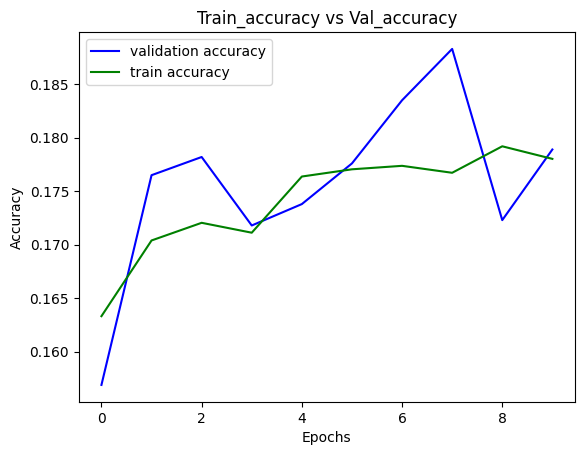

In [47]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

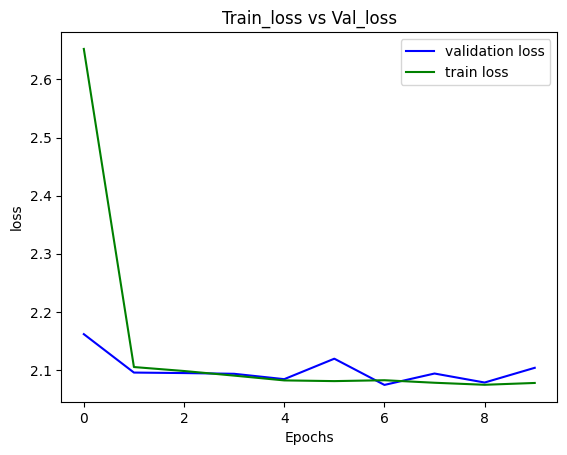

In [48]:
plt.plot(result.history['val_loss'],label="validation loss",color="blue")
plt.plot(result.history['loss'],label="train loss",color="green")
plt.title("Train_loss vs Val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Experiment with depth(number of hidden layers)

In [49]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])

#plt.imshow(x_train[0])
#plt.show()
print("***************************")
#print(f"label is :{y_train[0]}")

#normalize
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0

#to_categorical
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)



uint8
(50000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
***************************
before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [50]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time
result_1 = result

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1504 - loss: 2.4412 - val_accuracy: 0.1801 - val_loss: 2.0801
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1749 - loss: 2.0802 - val_accuracy: 0.1763 - val_loss: 2.0767
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1814 - loss: 2.0668 - val_accuracy: 0.1537 - val_loss: 2.1109
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1819 - loss: 2.0636 - val_accuracy: 0.1873 - val_loss: 2.0560
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1796 - loss: 2.0604 - val_accuracy: 0.1800 - val_loss: 2.0600
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1805 - loss: 2.0576 - val_accuracy: 0.1699 - val_loss: 2.0649
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1814 - loss: 2.0559 - val_accuracy: 0.1765 - val_loss: 2.0554
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1850 - loss: 2.0564 - val_accuracy: 0.

In [52]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1824 - loss: 2.0429
test loss:2.0428833961486816
test accuracy:0.18240000307559967


In [53]:
model_3 = Sequential()
model_3.add(Flatten(input_shape =(32,32,3)))
model_3.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_3.add(Dense(128,'relu'))
model_3.add(Dense(128,'relu'))
model_3.add(Dense(10,'softmax'))       #10 neurons last layer
model_3.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_3.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time
result_3 = result

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2684 - loss: 2.0616 - val_accuracy: 0.2892 - val_loss: 1.9077
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3221 - loss: 1.8454 - val_accuracy: 0.3438 - val_loss: 1.8332
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3349 - loss: 1.8246 - val_accuracy: 0.3334 - val_loss: 1.8212
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3349 - loss: 1.8164 - val_accuracy: 0.3268 - val_loss: 1.8530
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3403 - loss: 1.8092 - val_accuracy: 0.3434 - val_loss: 1.8044
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3463 - loss: 1.7943 - val_accuracy: 0.3357 - val_loss: 1.8273
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3472 - loss: 1.7964 - val_accuracy: 0.3219 - val_loss: 1.8738
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3496 - loss: 1.7909 - val_accuracy: 0.

In [54]:
#Evaluate
loss,accuracy = model_3.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3425 - loss: 1.8032
test loss:1.8031541109085083
test accuracy:0.3425000011920929


In [55]:
model_5 = Sequential()
model_5.add(Flatten(input_shape =(32,32,3)))
model_5.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(10,'softmax'))       #10 neurons last layer
model_5.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_5.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time
result_5 = result

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2171 - loss: 2.0943 - val_accuracy: 0.2709 - val_loss: 1.9253
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.2865 - loss: 1.9100 - val_accuracy: 0.2939 - val_loss: 1.8992
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2857 - loss: 1.8985 - val_accuracy: 0.3019 - val_loss: 1.8898
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3011 - loss: 1.8742 - val_accuracy: 0.2676 - val_loss: 1.9651
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.2995 - loss: 1.8608 - val_accuracy: 0.2946 - val_loss: 1.8697
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3000 - loss: 1.8600 - val_accuracy: 0.2922 - val_loss: 1.8810
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3129 - loss: 1.8405 - val_accuracy: 0.3109 - val_loss: 1.8522
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3094 - loss: 1.8354 - val_accu

In [56]:
#Evaluate
loss,accuracy = model_5.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3040 - loss: 1.9097
test loss:1.9096894264221191
test accuracy:0.30399999022483826


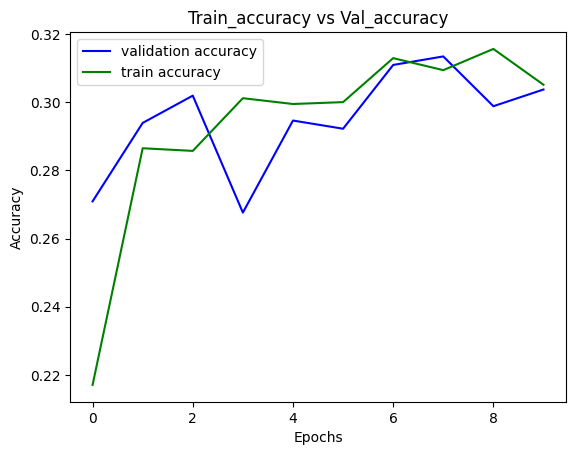

In [57]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

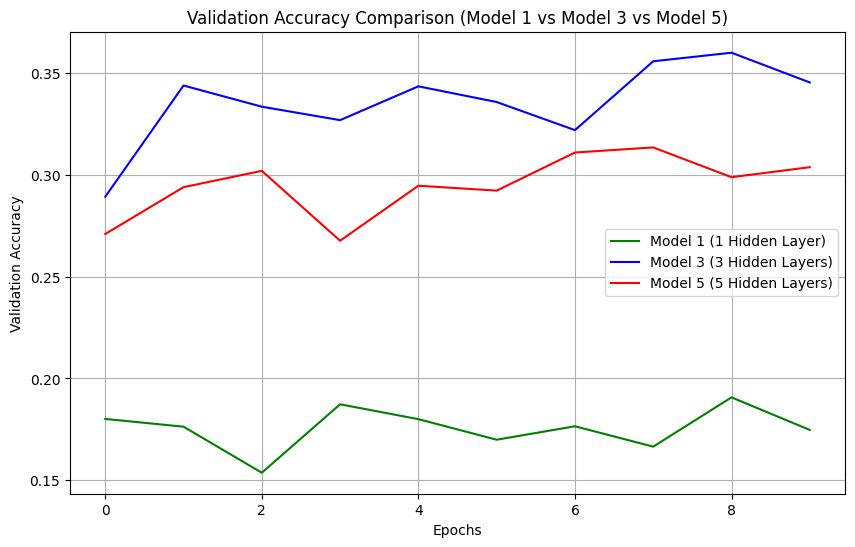

In [58]:
# Visualization for all three models
plt.figure(figsize=(10,6))
plt.plot(result_1.history['val_accuracy'], label='Model 1 (1 Hidden Layer)', color='green')
plt.plot(result_3.history['val_accuracy'], label='Model 3 (3 Hidden Layers)', color='blue')
plt.plot(result_5.history['val_accuracy'], label='Model 5 (5 Hidden Layers)', color='red')
plt.title('Validation Accuracy Comparison (Model 1 vs Model 3 vs Model 5)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])

print("***************************")

#normalize
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

#to_categorical
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)


# -----------------------------
# Model 1 - Using SGD
# -----------------------------
model_SGD = Sequential()
model_SGD.add(Flatten(input_shape=(32,32,3)))
model_SGD.add(Dense(128, activation='relu'))
model_SGD.add(Dense(128, activation='relu'))
model_SGD.add(Dense(128, activation='relu'))
model_SGD.add(Dense(10, activation='softmax'))
model_SGD.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining with SGD optimizer...")
result_SGD = model_SGD.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
test_loss, test_accuracy = model_SGD.evaluate(x_test, y_test)
print(f"SGD Test Loss: {test_loss}")
print(f"SGD Test Accuracy: {test_accuracy}")


# -----------------------------
# Model 2 - Using Adam
# -----------------------------
model_adam = Sequential()
model_adam.add(Flatten(input_shape=(32,32,3)))
model_adam.add(Dense(128, activation='relu'))
model_adam.add(Dense(128, activation='relu'))
model_adam.add(Dense(128, activation='relu'))
model_adam.add(Dense(10, activation='softmax'))
model_adam.compile(optimizer=Adam(learning_rate=0.01),
                   loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining with Adam optimizer...")
result_adam = model_adam.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
test_loss, test_accuracy = model_adam.evaluate(x_test, y_test)
print(f"Adam Test Loss: {test_loss}")
print(f"Adam Test Accuracy: {test_accuracy}")


# -----------------------------
# Model 3 - Using RMSprop
# -----------------------------
model_RMSprop = Sequential()
model_RMSprop.add(Flatten(input_shape=(32,32,3)))
model_RMSprop.add(Dense(128, activation='relu'))
model_RMSprop.add(Dense(128, activation='relu'))
model_RMSprop.add(Dense(128, activation='relu'))
model_RMSprop.add(Dense(10, activation='softmax'))
model_RMSprop.compile(optimizer=RMSprop(learning_rate=0.01),
                      loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining with RMSprop optimizer...")
result_RMSprop = model_RMSprop.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
test_loss, test_accuracy = model_RMSprop.evaluate(x_test, y_test)
print(f"RMSprop Test Loss: {test_loss}")
print(f"RMSprop Test Accuracy: {test_accuracy}")




uint8
(50000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
***************************
before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

Training with SGD optimizer...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3134 - loss: 1.8825 - val_accuracy: 0.3344 - val_loss: 1.8270
Epoch 2/10
625/625 ━━━━

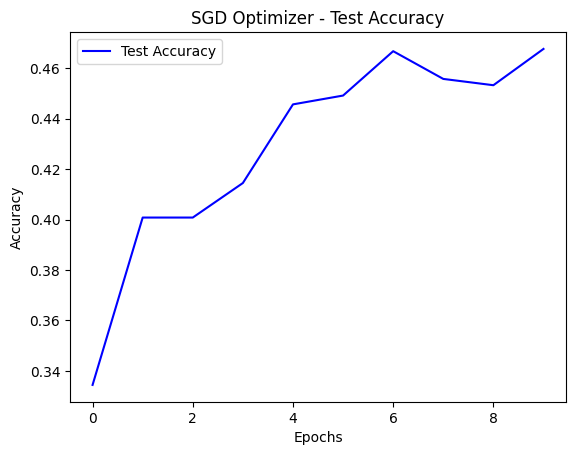

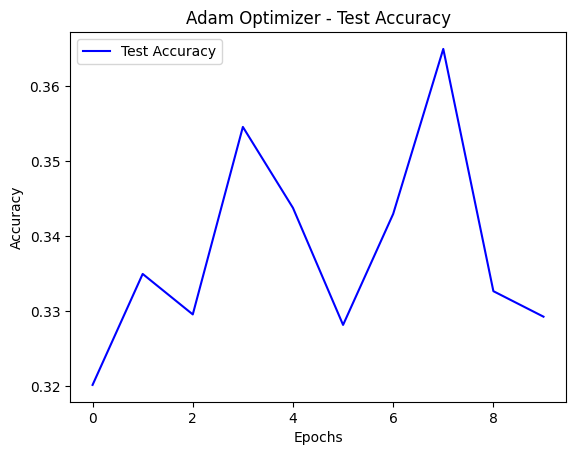

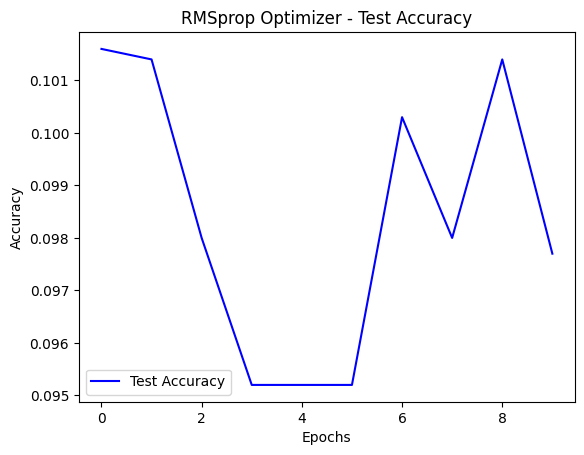

In [60]:
# SGD test accuracy graph
plt.plot(result_SGD.history['val_accuracy'], label='Test Accuracy', color='blue')
plt.title('SGD Optimizer - Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Adam test accuracy graph
plt.plot(result_adam.history['val_accuracy'], label='Test Accuracy', color='blue')
plt.title('Adam Optimizer - Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# RMSprop test accuracy graph
plt.plot(result_RMSprop.history['val_accuracy'], label='Test Accuracy', color='blue')
plt.title('RMSprop Optimizer - Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


(50000, 32, 32, 3)
(50000, 1)
Epoch 1/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.2591 - loss: 2.2455 - val_accuracy: 0.3424 - val_loss: 1.8507
Epoch 2/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3247 - loss: 1.8979 - val_accuracy: 0.3551 - val_loss: 1.8216
Epoch 3/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3622 - loss: 1.7826 - val_accuracy: 0.4008 - val_loss: 1.6716
Epoch 4/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.3840 - loss: 1.7118 - val_accuracy: 0.3815 - val_loss: 1.7613
Epoch 5/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.4000 - loss: 1.6794 - val_accuracy: 0.3743 - val_loss: 1.7432
Epoch 6/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.4076 - loss: 1.6541 - val_accuracy: 0.3747 - val_loss: 1.7566
Epoch 7/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.4178 - loss: 1.6327 - val_accuracy: 0.4024 - val_loss: 1.6581
Epoch 8/80
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accu

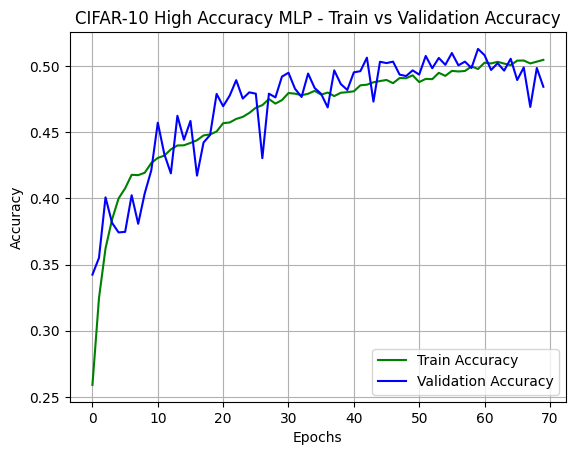

In [61]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

#normalize
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

#convert labels to categorical
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

#Model
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

#Compile
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Early Stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

#Train
result_high = model.fit(x_train, y_train, epochs=80, batch_size=128, validation_split=0.2, callbacks=[early_stop])

#Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

#Plot accuracy graph
plt.plot(result_high.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(result_high.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('CIFAR-10 High Accuracy MLP - Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\trisa\OneDrive\Desktop\DAY2\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\trisa\OneDrive\Desktop\DAY2\venv\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.2711 - loss: 2.3982 - val_accuracy: 0.3511 - val_loss: 2.0846
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.3535 - loss: 2.0898 - val_accuracy: 0.3647 - val_loss: 2.0581
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.3915 - loss: 1.9740 - val_accuracy: 0.4222 - val_loss: 1.8945
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.4136 - loss: 1.9058 - val_accuracy: 0.4095 - val_loss: 1.9075
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.4357 - loss: 1.8494 - val_accuracy: 0.3518 - val_loss: 2.1938
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.4518 - loss: 1.7991 - val_accuracy: 0.4365 - val_loss: 1.8245
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.4618 - loss: 1.7621 - val_accuracy: 0.4260 - val_loss: 1.8669
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.4757 - los

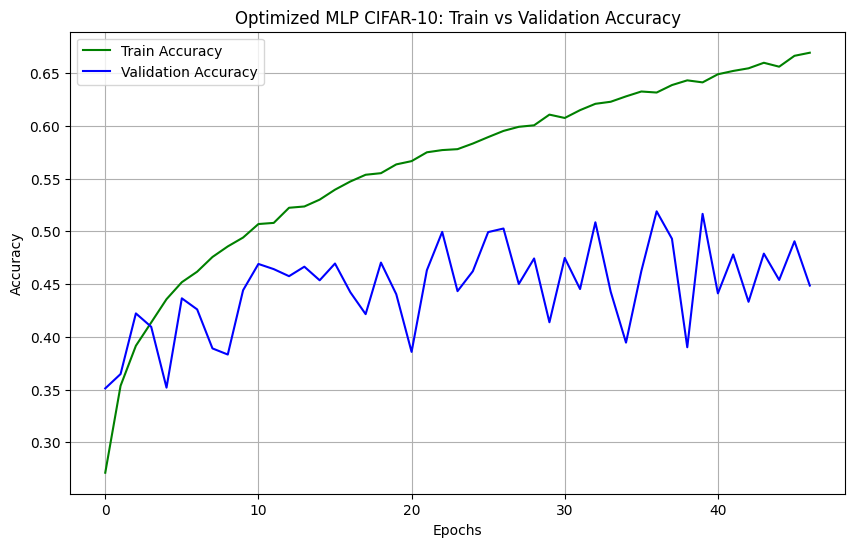

In [1]:

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, LeakyReLU
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model
model = Sequential([
    Flatten(input_shape=(32,32,3)),

    Dense(1024, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(512, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(256, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

# Compile
opt = Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n Final Test Accuracy: {test_accuracy:.4f}")

# Plot
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Optimized MLP CIFAR-10: Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
